# Liquid-to-Solid Phase Transition Simulation

## Simulation Setup

- **Variables**:
  - `L = 10.0`

- **Units and Atom Style**:
  - Units: Lennard-Jones (`lj`)
  - Atom style: `atomic`

- **Simulation Box and Atoms**:
  ```text
  lattice         fcc 0.8442
  region          box block 0 ${L} 0 ${L} 0 ${L}
  create_box      1 box
  create_atoms    1 box
  mass            1 1.0
  ```

- **Interatomic Potential**:
  ```text
  pair_style      lj/cut 2.5
  pair_coeff      1 1 1.0 1.0 2.5
  ```

- **Neighbour Settings**:
  ```text
  neighbor        0.3 bin
  neigh_modify    delay 0 every 1 check yes
  ```

- **Time Step**:
  - Timestep: `0.005`

- **NPT Ensemble**:
  ```text
  fix             1 all npt temp 2.0 0.7 1.0 iso 0.0 0.0 5.0
  ```

- **Thermodynamic Output**:
  ```text
  thermo          100
  thermo_style    custom step temp press pe ke etotal density
  ```

- **Dumping Atom Data**:
  ```text
  dump            mydump all custom 100 ${dumpfile} id type x y z vx vy vz
  ```

- **Simulation Duration**:
  - Total run: `50000` steps

---

## Observations

### Liquid-to-Solid Transition
- Particles underwent a **liquid-to-solid phase transition**, forming a crystalline structure.
- The spontaneous transition was observed between **Timestep 990 to 1010** using Ovito.

---

## Notes on Simulation Parameters
1. **T_damp**: A larger value slows cooling, allowing better equilibration.
2. To **observe melting**, change:
   ```text
   fix 1 all npt temp 0.7 2.0 1.0 iso 0.0 0.0 5.0
   ```
3. To allow the box dimensions to change **independently**:
   ```text
   fix 1 all npt temp ... aniso ...
   ```

---

## Thermodynamic Data Analysis

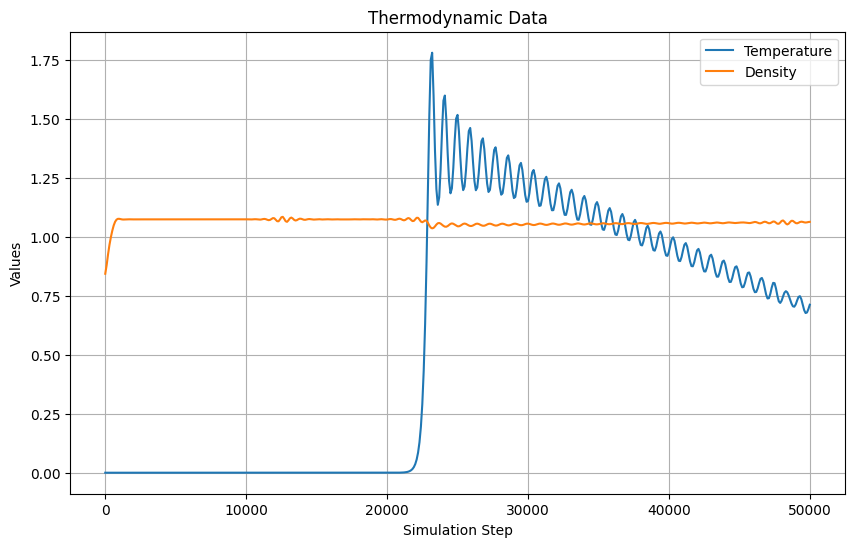

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from the slurm file
file_path = "dumps/slurm-10754841.out"
columns = ["Step", "Temp", "Press", "PotEng", "KinEng", "TotEng", "Density"]
data = []

# Read the file
with open(file_path, 'r') as file:
    for line in file:
        # Skip empty or malformed lines
        try:
            # Attempt to parse the line into floats
            data.append([float(x) for x in line.split()])
        except ValueError:
            continue  # Skip lines that can't be converted

# Create DataFrame
df = pd.DataFrame(data, columns=columns)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df["Step"], df["Temp"], label="Temperature")
plt.plot(df["Step"], df["Density"], label="Density")
plt.xlabel("Simulation Step")
plt.ylabel("Values")
plt.title("Thermodynamic Data")
plt.legend()
plt.grid()
plt.show()

# Save data for further processing
# df.to_csv("thermodynamic_data.csv", index=False)
